In [17]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
truth = np.asanyarray(file['bi_preds'])
truth.shape

(20, 400)

In [35]:
truth = np.asanyarray(file['truth'])
bi_preds = np.asanyarray(file['bi_preds'])
bi_preds_cover_self = np.asanyarray(file['bi_preds_cover_self'])
multi_preds = np.asanyarray(file['multi_preds'])
multi_preds_cover_self = np.asanyarray(file['multi_preds_cover_self'])

In [80]:
repeat = 3
bp_max = truth[repeat][np.argmax(bi_preds[repeat])]
bpcs_max = truth[repeat][np.argmax(bi_preds_cover_self[repeat])]
mp_max = truth[repeat][np.argmax(multi_preds[repeat])]
mpcs_max = truth[repeat][np.argmax(multi_preds_cover_self[repeat])]

In [81]:
bp_max,bpcs_max,mp_max,mpcs_max

(22.0, 22.0, 28.0, 19.0)

In [38]:
sorted_truth

[6.0,
 7.0,
 7.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.

In [39]:
bp_idx

657

In [40]:
len(truth[repeat])

400

In [41]:
sorted_truth = sorted(truth[repeat])
bp_idx = np.where(sorted_truth == bp_max)[0][-1]
bpcs_idx = np.where(sorted_truth == bpcs_max)[0][-1]
mp_idx = np.where(sorted_truth == mp_max)[0][-1]
mpcs_idx = np.where(sorted_truth == mpcs_max)[0][-1]
bp_idx,bpcs_idx,mp_idx,mpcs_idx

(385, 318, 210, 385)

## alpha 

In [3]:
dn,tn = 9,10

bip_rank,bipcs_rank,mp_rank,mpcs_rank = np.ndarray(shape=(dn,tn)),np.ndarray(shape=(dn,tn)),np.ndarray(shape=(dn,tn)),np.ndarray(shape=(dn,tn))

for drop_num in range(4,13):
    for test_size in range(1,11):
        ##Load corresponding pickle files
        if test_size == 10:
            file_path = '../result/drops-{0}__test_size-0.1__batch_size-64'.format(drop_num)
        else:
            file_path = '../result/drops-{0}__test_size-0.0{1}__batch_size-64'.format(drop_num,test_size)
        file = pickle.load(open(file_path,'rb'))
        
        truth = np.asanyarray(file['truth'])
        bi_preds = np.asanyarray(file['bi_preds'])
        bi_preds_cover_self = np.asanyarray(file['bi_preds_cover_self'])
        multi_preds = np.asanyarray(file['multi_preds'])
        multi_preds_cover_self = np.asanyarray(file['multi_preds_cover_self'])
        
        bp_avg,bpcs_avg,mp_avg,mpcs_avg = [],[],[],[]
        
        for i in range(20):
            bp_max = truth[i][np.argmax(bi_preds[i])]
            bpcs_max = truth[i][np.argmax(bi_preds_cover_self[i])]
            mp_max = truth[i][np.argmax(multi_preds[i])]
            mpcs_max = truth[i][np.argmax(multi_preds_cover_self[i])]
            
            sorted_truth = sorted(truth[i])
            
            bp_avg.append(np.where(sorted_truth == bp_max)[0][0])
            bpcs_avg.append(np.where(sorted_truth == bpcs_max)[0][0])
            mp_avg.append(np.where(sorted_truth == mp_max)[0][0])
            mpcs_avg.append(np.where(sorted_truth == mpcs_max)[0][0])
        
        bip_rank[drop_num-4][test_size-1] = np.mean(bp_avg) / len(truth[0])
        bipcs_rank[drop_num-4][test_size-1] = np.mean(bpcs_avg) / len(truth[0])
        mp_rank[drop_num-4][test_size-1] = np.mean(mp_avg) / len(truth[0])
        mpcs_rank[drop_num-4][test_size-1] = np.mean(mpcs_avg) / len(truth[0])
        

**Visualization**

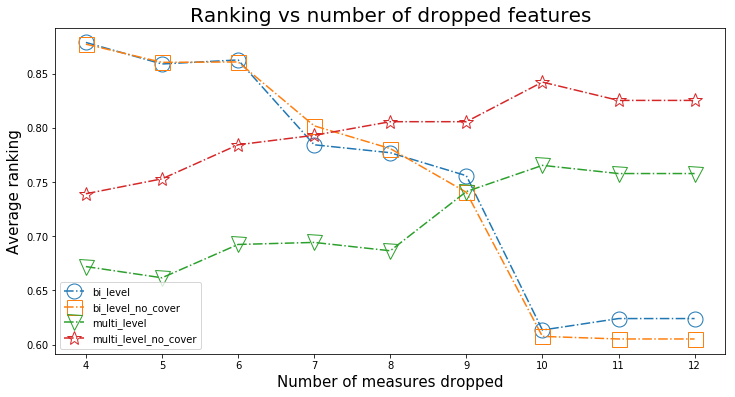

In [4]:
fig,ax = plt.subplots(figsize=(12,6))
drops = [i for i in range(4,13)]
bip_val = np.mean(bip_rank,axis=1)
bipcs_val = np.mean(bipcs_rank,axis=1)
mp_val = np.mean(mp_rank,axis=1)
mpcs_val = np.mean(mpcs_rank,axis=1)
plt.plot(drops,bip_val,label='bi_level',linestyle='-.',marker="o",markersize=15,markerfacecolor="None")
plt.plot(drops,bipcs_val, label='bi_level_no_cover',linestyle='-.',marker="s",markersize=15,markerfacecolor="None")
plt.plot(drops,mp_val,label='multi_level',linestyle='-.',marker="v",markersize=15,markerfacecolor="None")
plt.plot(drops,mpcs_val,label='multi_level_no_cover',linestyle='-.',marker="*",markersize=15,markerfacecolor="None")
plt.legend()
plt.xlabel('Number of measures dropped',fontsize=15)
plt.ylabel('Average ranking',fontsize=15)
plt.title('Ranking vs number of dropped features',fontsize=20);

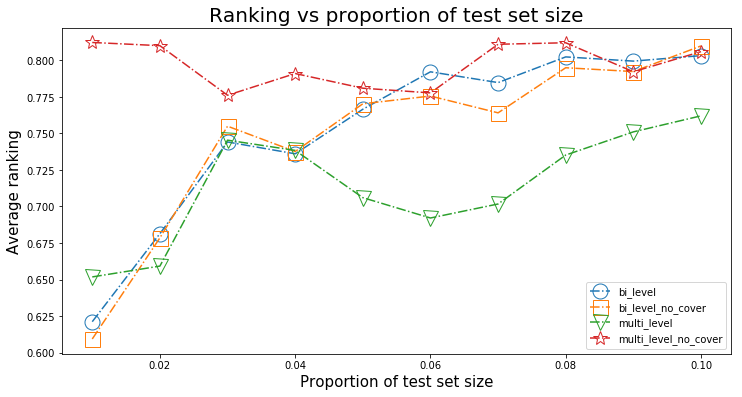

In [5]:
fig,ax = plt.subplots(figsize=(12,6))
drops = [i/100 for i in range(1,11)]
bip_val = np.mean(bip_rank,axis=0)
bipcs_val = np.mean(bipcs_rank,axis=0)
mp_val = np.mean(mp_rank,axis=0)
mpcs_val = np.mean(mpcs_rank,axis=0)
plt.plot(drops,bip_val,label='bi_level',linestyle='-.',marker="o",markersize=15,markerfacecolor="None")
plt.plot(drops,bipcs_val, label='bi_level_no_cover',linestyle='-.',marker="s",markersize=15,markerfacecolor="None")
plt.plot(drops,mp_val,label='multi_level',linestyle='-.',marker="v",markersize=15,markerfacecolor="None")
plt.plot(drops,mpcs_val,label='multi_level_no_cover',linestyle='-.',marker="*",markersize=15,markerfacecolor="None")
plt.legend()
plt.xlabel('Proportion of test set size',fontsize=15)
plt.ylabel('Average ranking',fontsize=15)
plt.title('Ranking vs proportion of test set size',fontsize=20);

## Quantile

In [6]:
file = pickle.load(open( '../result_quantile/quantile__drops-3__test_size-0.02__batch_size-64', "rb" ))

In [7]:
file.keys()

dict_keys(['time', 'truth', 'bi_preds', 'bi_preds_lin', 'bi_preds_cover_self', 'multi_preds', 'multi_preds_lin', 'multi_preds_cover_self', 'bi_preds_theta', 'bi_preds_lin_theta', 'bi_preds_cover_self_theta', 'multi_preds_theta', 'multi_preds_lin_theta', 'multi_preds_cover_self_theta'])

In [8]:
truth = np.asanyarray(file['truth'])
bi_preds = np.asanyarray(file['bi_preds'])
bi_preds_cover_self = np.asanyarray(file['bi_preds_cover_self'])
bi_preds_lin = np.asanyarray(file['bi_preds_lin'])
multi_preds = np.asanyarray(file['multi_preds'])
multi_preds_lin = np.asanyarray(file['multi_preds_lin'])
multi_preds_cover_self = np.asanyarray(file['multi_preds_cover_self'])

In [9]:
repeat = 6

bp_max = truth[repeat][np.argmax(bi_preds[repeat])]
bpcs_max = truth[repeat][np.argmax(bi_preds_cover_self[repeat])]
bp_lin_max = truth[repeat][np.argmax(bi_preds_lin[repeat])]
mp_max = truth[repeat][np.argmax(multi_preds[repeat])]
mpcs_max = truth[repeat][np.argmax(multi_preds_cover_self[repeat])]
mpcs_lin_max = truth[repeat][np.argmax(multi_preds_lin[repeat])]

In [10]:
bp_max,bpcs_max,bp_lin_max,mp_max,mpcs_max,mpcs_lin_max

(18.0, 18.0, 20.0, 27.0, 30.0, 30.0)

In [11]:
dn,tn = 12,10

bip_rank,bipcs_rank,bip_lin_rank = np.ndarray(shape=(dn,tn)),np.ndarray(shape=(dn,tn)),np.ndarray(shape=(dn,tn))
mp_rank,mpcs_rank,mp_lin_rank = np.ndarray(shape=(dn,tn)),np.ndarray(shape=(dn,tn)),np.ndarray(shape=(dn,tn))

for drop_num in range(1,13):
    for test_size in range(1,11):
        ##Load corresponding pickle files
        if test_size == 10:
            file_path = '../result_quantile/quantile__drops-{0}__test_size-0.1__batch_size-64'.format(drop_num)
        else:
            file_path = '../result_quantile/quantile__drops-{0}__test_size-0.0{1}__batch_size-64'.format(drop_num,test_size)
        file = pickle.load(open(file_path,'rb'))
        
        truth = np.asanyarray(file['truth'])
        bi_preds = np.asanyarray(file['bi_preds'])
        bi_preds_cover_self = np.asanyarray(file['bi_preds_cover_self'])
        bi_preds_lin = np.asanyarray(file['bi_preds_lin'])
        multi_preds = np.asanyarray(file['multi_preds'])
        multi_preds_cover_self = np.asanyarray(file['multi_preds_cover_self'])
        multi_preds_lin = np.asanyarray(file['multi_preds_lin'])
        
        bp_avg,bpcs_avg,bp_lin_avg,mp_avg,mpcs_avg,mp_lin_avg = [],[],[],[],[],[]
        
        for i in range(20):
            bp_max = truth[i][np.argmax(bi_preds[i])]
            bpcs_max = truth[i][np.argmax(bi_preds_cover_self[i])]
            bp_lin_max = truth[i][np.argmax(bi_preds_lin[i])]
            mp_max = truth[i][np.argmax(multi_preds[i])]
            mpcs_max = truth[i][np.argmax(multi_preds_cover_self[i])]
            mp_lin_max = truth[i][np.argmax(multi_preds_lin[i])]
            
            sorted_truth = sorted(truth[i])
            
            bp_avg.append(np.where(sorted_truth == bp_max)[0][0])
            bpcs_avg.append(np.where(sorted_truth == bpcs_max)[0][0])
            bp_lin_avg.append(np.where(sorted_truth == bp_lin_max)[0][0])
            mp_avg.append(np.where(sorted_truth == mp_max)[0][0])
            mpcs_avg.append(np.where(sorted_truth == mpcs_max)[0][0])
            mp_lin_avg.append(np.where(sorted_truth == mp_lin_max)[0][0])
        
        bip_rank[drop_num-1][test_size-1] = np.mean(bp_avg) / len(truth[0])
        bipcs_rank[drop_num-1][test_size-1] = np.mean(bpcs_avg) / len(truth[0])
        bip_lin_rank[drop_num-1][test_size-1] = np.mean(bp_lin_avg) / len(truth[0])
        mp_rank[drop_num-1][test_size-1] = np.mean(mp_avg) / len(truth[0])
        mpcs_rank[drop_num-1][test_size-1] = np.mean(mpcs_avg) / len(truth[0])
        mp_lin_rank[drop_num-1][test_size-1] = np.mean(mp_lin_avg) / len(truth[0])
        

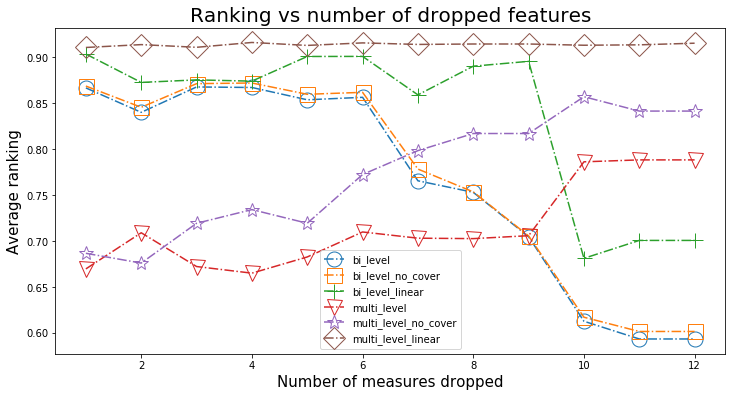

In [12]:
fig,ax = plt.subplots(figsize=(12,6))
drops = [i for i in range(1,13)]
bip_val = np.mean(bip_rank,axis=1)
bipcs_val = np.mean(bipcs_rank,axis=1)
bip_lin_val = np.mean(bip_lin_rank,axis=1)
mp_val = np.mean(mp_rank,axis=1)
mpcs_val = np.mean(mpcs_rank,axis=1)
mp_lin_val = np.mean(mp_lin_rank,axis=1)

plt.plot(drops,bip_val,label='bi_level',linestyle='-.',marker="o",markersize=15,markerfacecolor="None")
plt.plot(drops,bipcs_val, label='bi_level_no_cover',linestyle='-.',marker="s",markersize=15,markerfacecolor="None")
plt.plot(drops,bip_lin_val, label='bi_level_linear',linestyle='-.',marker='+',markersize=15,markerfacecolor="None")
plt.plot(drops,mp_val,label='multi_level',linestyle='-.',marker="v",markersize=15,markerfacecolor="None")
plt.plot(drops,mpcs_val,label='multi_level_no_cover',linestyle='-.',marker="*",markersize=15,markerfacecolor="None")
plt.plot(drops,mp_lin_val,label='multi_level_linear',linestyle='-.',marker="D",markersize=15,markerfacecolor="None")
plt.legend()
plt.xlabel('Number of measures dropped',fontsize=15)
plt.ylabel('Average ranking',fontsize=15)
plt.title('Ranking vs number of dropped features',fontsize=20);

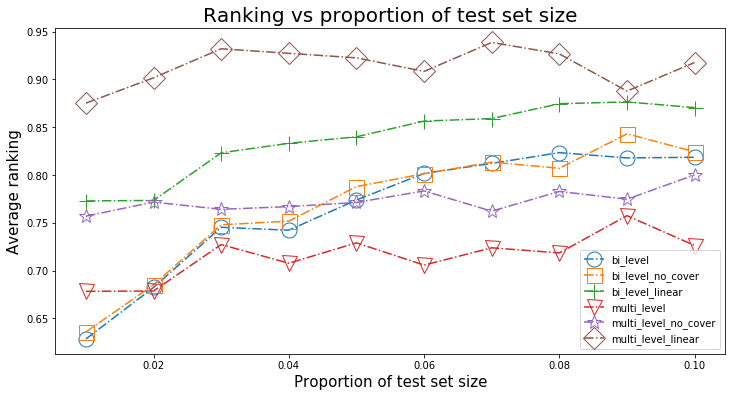

In [13]:
fig,ax = plt.subplots(figsize=(12,6))
drops = [i/100 for i in range(1,11)]
bip_val = np.mean(bip_rank,axis=0)
bipcs_val = np.mean(bipcs_rank,axis=0)
bip_lin_val = np.mean(bip_lin_rank,axis=0)
mp_val = np.mean(mp_rank,axis=0)
mpcs_val = np.mean(mpcs_rank,axis=0)
mp_lin_val = np.mean(mp_lin_rank,axis=0)

plt.plot(drops,bip_val,label='bi_level',linestyle='-.',marker="o",markersize=15,markerfacecolor="None")
plt.plot(drops,bipcs_val, label='bi_level_no_cover',linestyle='-.',marker="s",markersize=15,markerfacecolor="None")
plt.plot(drops,bip_lin_val, label='bi_level_linear',linestyle='-.',marker='+',markersize=15,markerfacecolor="None")
plt.plot(drops,mp_val,label='multi_level',linestyle='-.',marker="v",markersize=15,markerfacecolor="None")
plt.plot(drops,mpcs_val,label='multi_level_no_cover',linestyle='-.',marker="*",markersize=15,markerfacecolor="None")
plt.plot(drops,mp_lin_val,label='multi_level_linear',linestyle='-.',marker="D",markersize=15,markerfacecolor="None")
plt.legend()
plt.xlabel('Proportion of test set size',fontsize=15)
plt.ylabel('Average ranking',fontsize=15)
plt.title('Ranking vs proportion of test set size',fontsize=20);

## Linear regression

In [14]:
with open('./Data/states_bpleq65.p','rb') as f:
    states = pickle.load(f)

In [28]:
patient_ids = list(states.keys())

In [29]:
pid = patient_ids[0]
df_clean = states[pid].loc[:,~states[pid].columns.isin(['Times','bicarbonate_ind', 'bun_ind','creatinine_ind',
                                                        'fio2_ind','glucose_ind','hct_ind','hr_ind','lactate_ind',
                                                        'magnesium_ind','meanbp_ind','platelets_ind','potassium_ind',
                                                        'sodium_ind','spo2_ind','spontaneousrr_ind','temp_ind',
                                                        'urine_ind','wbc_ind'])]

df_clean.insert(0,'ICU_ID',pid)
df_x_train = df_clean.loc[:,~df_clean.columns.isin(['sofa','oasis','saps'])]
df_y_train = df_clean[['sofa','oasis','saps']]

x_train = df_x_train.iloc[0]
y_train = df_y_train.iloc[0]


for pid in patient_ids[1:]:
    df_clean = states[pid].loc[:,~states[pid].columns.isin(['Times','bicarbonate_ind', 'bun_ind','creatinine_ind',
                                                            'fio2_ind','glucose_ind','hct_ind','hr_ind','lactate_ind',
                                                            'magnesium_ind','meanbp_ind','platelets_ind','potassium_ind',
                                                            'sodium_ind','spo2_ind','spontaneousrr_ind','temp_ind',
                                                            'urine_ind','wbc_ind'])]
    
    df_clean.insert(0,'ICU_ID',pid)
    df_x_train = df_clean.loc[:,~df_clean.columns.isin(['sofa','oasis','saps'])]
    df_y_train = df_clean[['sofa','oasis','saps']]
    
    x_train = pd.concat([x_train,df_x_train.iloc[0]],axis=1)
    y_train = pd.concat([y_train,df_y_train.iloc[0]],axis=1)

In [30]:
x_train = x_train.T.reset_index(drop=True)
y_train = y_train.T.reset_index(drop=True)

x_train = x_train.drop(['ICU_ID'],axis=1)

In [32]:
measure_freq = {'bicarbonate': 2.981861,'bun': 1.499739,'creatinine': 1.505387,\
                'fio2': 9.647378,'glucose': 6.117458,'hct': 1.975867,'lactate': 1.330443,\
                'magnesium': 1.955151,'platelets': 1.459454,'potassium': 2.182242,\
                'sodium': 1.744012,'wbc': 1.395242}
harder_measure = sorted(measure_freq, key=measure_freq.get)

In [ ]:
for i in range(repeat):
    np.random.seed(i)
    index = np.random.choice(len(x_train), size=10000, replace=False)
    x, y = x_train.iloc[index], y_train.iloc[index]
    